In [1]:
import datetime
import requests
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
def get_market_data(market, granularity):
    resp = requests.get('https://api.pro.coinbase.com/products/' + market + '/candles?granularity=' + str(granularity))
    if resp.status_code != 200:
        raise Exception(format(resp.json()['message']))
    else:
        df = pd.DataFrame(resp.json(), columns=[ 'epoch', 'low', 'high', 'open', 'close', 'volume' ])
        df = df.iloc[::-1].reset_index()
        return df

In [3]:
df = get_market_data('BTC-GBP', 86400)

In [4]:
df.head()

,index,epoch,low,high,open,close,volume
0,299,1596412800,8377.48,8813.00,8467.46,8612.62,863.945547
1,298,1596499200,8518.44,8741.99,8613.20,8576.50,738.526003
2,297,1596585600,8507.00,9000.00,8577.83,8965.03,938.203704
3,296,1596672000,8840.17,9078.82,8968.87,8978.47,814.615215
4,295,1596758400,8708.53,9090.00,8977.59,8911.89,914.931187


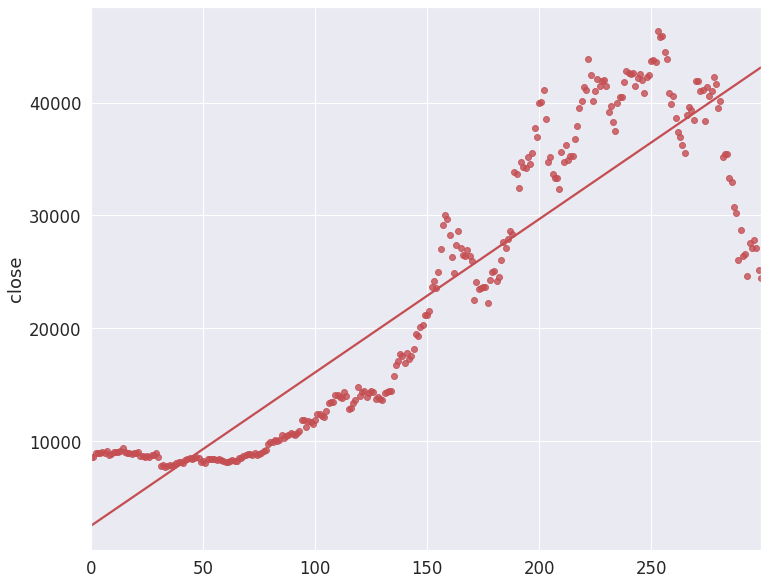

In [5]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,10))
sns.regplot(x=df.index, y='close', data=df, ci=None, color='r')

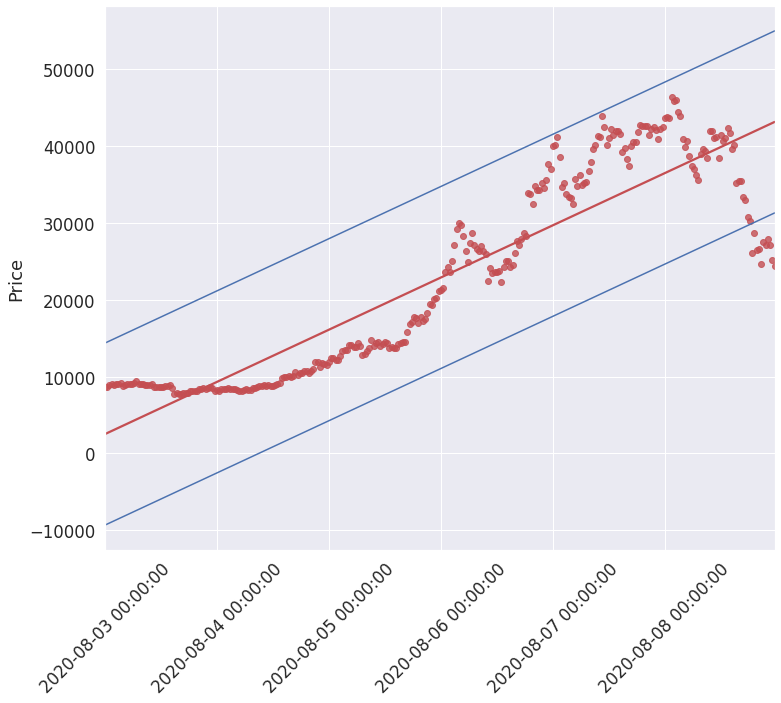

In [6]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,10))
rp = sns.regplot(x=df.index, y='close', data=df, ci=None, color='r')

y_rp = rp.get_lines()[0].get_ydata()
x_rp = rp.get_lines()[0].get_xdata()
sns.lineplot(x=x_rp, y=y_rp + np.std(y_rp), color='b')
sns.lineplot(x=x_rp, y=y_rp - np.std(y_rp), color='b')

tsidx = pd.DatetimeIndex(pd.to_datetime(df['epoch'], unit='s'), dtype='datetime64[ns]', freq='D')
rp.set_xticklabels(tsidx, rotation=45)

plt.xlabel('')
plt.ylabel('Price')
plt.show()